In [5]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the data transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to a uniform size
    transforms.ToTensor(),          # Convert images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize with mean and std dev
])

# Load the dataset from a folder structure
data_path = 'cnn_dataset'
dataset = datasets.ImageFolder(root=data_path, transform=transform)

# Create a DataLoader
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Print dataset information for analysis
print(f"Number of classes: {len(dataset.classes)}")
print(f"Class labels: {dataset.classes}")

# Iterate through the DataLoader to check sample data
for images, labels in dataloader:
    print(f"Batch size: {images.size()}")
    print(f"Labels: {labels}")
    break  # Remove this line to go through the entire dataset

Number of classes: 36
Class labels: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Batch size: torch.Size([32, 3, 128, 128])
Labels: tensor([ 9, 11,  9, 27,  1, 18, 11,  6, 29,  4,  2, 25, 35, 35,  7, 22, 10, 32,
        34, 17, 10,  1,  7,  8, 21,  6, 23, 19,  5,  2,  8,  4])


Number of images: 100800
Number of classes: 36
Class distribution:
0: 2800 images
1: 2800 images
2: 2800 images
3: 2800 images
4: 2800 images
5: 2800 images
6: 2800 images
7: 2800 images
8: 2800 images
9: 2800 images
A: 2800 images
B: 2800 images
C: 2800 images
D: 2800 images
E: 2800 images
F: 2800 images
G: 2800 images
H: 2800 images
I: 2800 images
J: 2800 images
K: 2800 images
L: 2800 images
M: 2800 images
N: 2800 images
O: 2800 images
P: 2800 images
Q: 2800 images
R: 2800 images
S: 2800 images
T: 2800 images
U: 2800 images
V: 2800 images
W: 2800 images
X: 2800 images
Y: 2800 images
Z: 2800 images


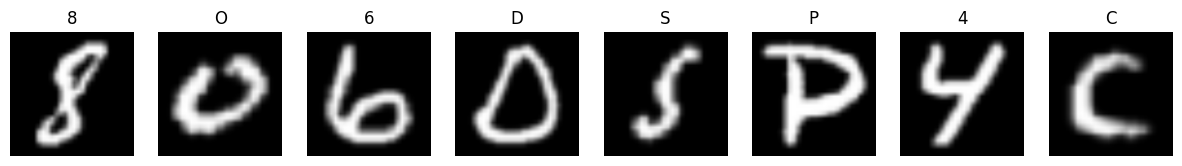

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display a batch of images with their labels
def show_images(dataloader, classes, num_images=8):
    images, labels = next(iter(dataloader))  # Get a batch of images
    images = images[:num_images]  # Select only the specified number of images
    labels = labels[:num_images]
    
    # Plot images in a grid
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        image = images[i].numpy().transpose((1, 2, 0))  # Convert tensor to numpy array
        mean = np.array([0.5, 0.5, 0.5])
        std = np.array([0.5, 0.5, 0.5])
        image = std * image + mean  # Unnormalize the image
        image = np.clip(image, 0, 1)  # Clip values to be in the range [0, 1]
        
        axes[i].imshow(image)
        axes[i].set_title(classes[labels[i].item()])
        axes[i].axis('off')

    plt.show()

# Display dataset statistics
def analyze_dataset(dataset):
    print(f"Number of images: {len(dataset)}")
    print(f"Number of classes: {len(dataset.classes)}")
    print("Class distribution:")
    class_counts = [0] * len(dataset.classes)
    
    for _, label in dataset:
        class_counts[label] += 1
    
    for i, count in enumerate(class_counts):
        print(f"{dataset.classes[i]}: {count} images")

# Call the functions
analyze_dataset(dataset)
show_images(dataloader, dataset.classes)
